# Differentialgleichungen


## Arbeitsblatt zur Einarbeitung


Dieses Arbeitsblatt muss vor der Lektion am Donnerstag durchgearbeitet werden. Hier lernst du die einfachste Lösungsmethode für gewöhnliche Differentialgleichungen kennen, das **Euler-Verfahren**.

## Gewöhnliche Differentialgleichungen

Die **Differentialgleichung** (DGL) ist ein mathematisches Werkzeug, das verwendet wird, um den Zusammenhang zwischen einer Funktion und ihrer Ableitung zu beschreiben. Im Wesentlichen ist es eine Gleichung, die eine unbekannte Funktion und ihre Ableitung(en) enthält.

Differentialgleichungen sind in vielen Bereichen der Physik, der Natur- und Ingenieurwissenschaften sowie anderen Wissenschaften wie der Ökonomie von entscheidender Bedeutung. Sie werden dazu verwendet, mathematische Modelle zu erstellen, die das Verhalten von dynamischen Systemen beschreiben. Solche Systeme sind aus dem Modul **Systeme und Modelle der Physik** bekannt. Dort wird das Tool **Stella** verwendet, um Differentialgleichungssysteme zu modellieren und zu lösen.

Eine **gewöhnliche Differentialgleichung** (engl. *ordinary differential equation*, ODE) ist eine Differentialgleichung, in der die gesuchte Funktion nur von einer Variablen abhängt, meist $t$ oder $x$ genannt.

Wikipedia:
- [Differentialgleichung](https://de.wikipedia.org/wiki/Differentialgleichung)
- [Gewöhnliche Differentialgleichung](https://de.wikipedia.org/wiki/Gew%C3%B6hnliche_Differentialgleichung)


## Euler-Verfahren


> Das eulersche Polygonzugverfahren oder explizite Euler-Verfahren (auch Euler-Cauchy-Verfahren oder Euler-vorwärts-Verfahren) ist das einfachste Verfahren zur numerischen Lösung eines Anfangswertproblems. [Explizites Euler-Verfahren - Wikipedia](https://de.wikipedia.org/wiki/Explizites_Euler-Verfahren)

Das folgende Video erklärt das Euler-Verfahren:

- ["Euler-Verfahren" - Kochrezepte für Mathematik](https://www.youtube.com/watch?v=EhyNxBeNZuM)

In dem Video werden DGL der Form

$$ \frac{dy}{dx} = f(x, y) \quad\text{mit}\quad y(x_0) = y_0 $$

behandelt. Das heisst die abhängige Variable (gesuchte Funktion) heisst $y$ und die unabhängige Variable heisst $x$.

Weil DGL in den Naturwissenschaften häufig zeitlich dynamische Systeme beschreiben und auch SciPy $t$ statt $x$ verwendet, nehmen wir die Zeit $t$ als unabhängige Variable, also $x\to t$,

$$ \frac{dy}{dt} = f(t, y) \quad\text{mit}\quad y(t_0) = y_0 $$

Die Formel für das Euler-Verfahren ist aber die gleiche.

## Arbeitsauftrag

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy


### Aufgabe 1

#### a) Verfahren beschreiben

Schreibe die benötigten Schritte für das Euler-Verfahren auf.

In [2]:
def h(a,b,n):
    return (b-a)/n

def f_xk(x,k,h):
    return x + k * h 

h(0.3,0.1,2)

-0.09999999999999999

#### b) Beispiel vorbereiten


Als Beispiel nehmen wir die Differentialgleichung

$$ y'(t) = 3y(t) - e^{2t} $$

die auch im Video vorkommt. Definiere also die Funktion `f(t, y)`, welche für den Funktionswert $y$ an der Stelle $t$ die Ableitung $y'(t)$ berechnet.

In [3]:
def f(t, y):
    return 3*y - np.exp(2*t)

#### c) Verfahren implementieren

Programmiere nun eine Funktion `euler(f, y0, t0, t_end, h)`, die als Argumente die Funktion `f`, den Startwert `y0`, den Startpunkt `t0`, die Obergrenze `t_end` und die Schrittweite `h` nimmt, und die berechneten $t$- und $y$-Werte als zwei NumPy-Arrays zurückliefert.

In [4]:
# array -> beide Array müssen gleich lang sein -> schleife 
def euler(f, y0, t0, tend, h):
    t = np.arange(t0,tend + h, h ) 
    #tend + h weil die letzte zahl bei np.arange nicht berücksichtigt wird 
    
    y = np.zeros_like(t) # gleich langes Array erstellt 
    y[0] = y0  #leere liste erstellt mit anfangswert 0 
    
    #knackpunkt ist, dass man dies für alle punkte machen muss und das slicing verwendet wird. 
    for i in range(len(t)-1):
        dydt = f(t[i], y[i])
        y[i+1] = y[i] + h * dydt #gleiche Formel wie im Video 
        #knackpunkt ist, dass man dies für alle punkte machen muss und das slicing verwendet wird. 
    return t , y 


In [5]:
def euler_vectorized(f, y0, t0, tend, h):
    t = np.arange(t0, tend + h, h)
    y = np.zeros_like(t)
    y[0] = y0
    
    dydt = f(t, y)
    
    y[1:] = y[:-1] + h * dydt[:-1]  
    
    return t, y


In [10]:
#euler verfahren von Yassin 
def euler_1(f,y0,t0,tend,h):
    ts = [t0]
    ys = [y0]
    t,y = t0,y0
    
    while t < tend:
        y = y + h * f(t,y)
        t = t + h 
        ts.append(t)
        ys.append(y)
    return t,y

#### d) Funktionstest


Verifiziere deine Funktion mit dem Beispiel aus b) mit der Anfangsbedingung $y(0.1) = 1$, das heisst $(t_0, y_0) = (0.1, 1)$.

Löse dazu die Gleichung im Bereich $0.1 <= t <= 1.75$ mit der Schrittweite $h = 0.01$.

Erwartetes Resultat: $y(1.75) \approx 1.439616$.

In [28]:
t0, y0 = 0.1, 1.0
tend, h = 1.75, 0.01

t, y = euler(f, y0, t0, tend, h)
print(t,y)
t1, y1 = euler_vectorized(f, y0, t0, tend, h)

#hier ist wichtig, dass man den parameter y[-1], damit man den letzten Wert zurückbekommt 
# ansonsten bekommt man das ganze array über 
print(f"Der y wert and er Stelle y({tend}), ist {y[-1]}")

[0.1  0.11 0.12 0.13 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23
 0.24 0.25 0.26 0.27 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37
 0.38 0.39 0.4  0.41 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51
 0.52 0.53 0.54 0.55 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65
 0.66 0.67 0.68 0.69 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79
 0.8  0.81 0.82 0.83 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93
 0.94 0.95 0.96 0.97 0.98 0.99 1.   1.01 1.02 1.03 1.04 1.05 1.06 1.07
 1.08 1.09 1.1  1.11 1.12 1.13 1.14 1.15 1.16 1.17 1.18 1.19 1.2  1.21
 1.22 1.23 1.24 1.25 1.26 1.27 1.28 1.29 1.3  1.31 1.32 1.33 1.34 1.35
 1.36 1.37 1.38 1.39 1.4  1.41 1.42 1.43 1.44 1.45 1.46 1.47 1.48 1.49
 1.5  1.51 1.52 1.53 1.54 1.55 1.56 1.57 1.58 1.59 1.6  1.61 1.62 1.63
 1.64 1.65 1.66 1.67 1.68 1.69 1.7  1.71 1.72 1.73 1.74 1.75] [1.         1.01778597 1.03585878 1.05422206 1.07287942 1.0918345
 1.11109095 1.1306524  1.1505225  1.17070488 1.19120318 1.21202102
 1.23316204 1.25462983 1

## WTF was sind schon wieder Vektorisierte Funtionen?

<details>
<summary> Hier findest du die Infromationen
</summary>

**Kurz gesagt sind Vektorisierte Funktionen, Funktionen welche Operationen auf ganze Arrays von Zahlen anwenden. Solche Funktionen nennt man Vektorisierte Funktionen. Im Gegensatz zu einer Schleifen-basierten Implementierung führt eine vektorisierte Implementierung alle Operationen gleichzeitig auf den Elementen eines Arrays aus. Dadurch können vektorisierte Funktionen deutlich schneller ausgeführt werden.**

- [Vektorisierung und der Datentyp np.ndarray](https://openbook.rheinwerk-verlag.de/python/41_002.html)
- [Vektorized Functions](https://odlgroup.github.io/odl/guide/vectorization_guide.html)


</details>

In [29]:
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])

c = a + b
print(c)


[5 7 9]


#### e) Darstellung

Stelle das Ergebnis in einem Diagramm dar und vergleiche es mit der analytischen Lösung

$$ y(t) = e^{2t} - 0.164019 e^{3t} \,, $$

die [Wolfram|Alpha berechnet](https://www.wolframalpha.com/input?i=y%27+%3D+3+*+y+-+exp%282+*+t%29+with+y%280.1%29%3D1).

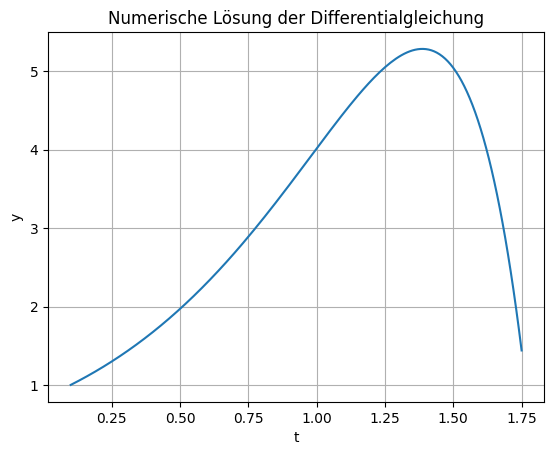

In [30]:
# Ergebnis plotten
plt.plot(t, y)
plt.xlabel('t')
plt.ylabel('y')
plt.title('Numerische Lösung der Differentialgleichung')
plt.grid()
plt.show()

### Aufgabe 2: SciPy Funktionen

#### a) Übersicht

Hir ist eine Übersicht der [SciPy Funktionen zur Lösung von Differentialgleichungssystemen](https://docs.scipy.org/doc/scipy/reference/integrate.html#solving-initial-value-problems-for-ode-systems).

- Die Funktion [`scipy.integrate.solve_ivp`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html) kann als Einstiegspunkt für alle Methoden verwenden werden.
- Die Funktion [`scipy.integrate.odeint`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html) wird zwar noch in vielen Blogpost und Tutorials verwendet, ist aber etwas veraltet und sollte im Normalfall nicht mehr verwendet werden.
- Ein Vergleich der beiden Funktionen findet sich zum Beispiel in diesem [Blogpost](https://danielmuellerkomorowska.com/2021/02/16/differential-equations-with-scipy-odeint-or-solve_ivp/).

Schaue dir die Dokumentation der Funktion `solve_ivp`, vor allem das erste Beispiel.

Beachte dabei, dass `solve_ivp` darauf ausgelegt ist, dass $y(t)$ eine mehrdimensionale (vektorwertige) Funktion ist. Das heisst, der Anfangswert `y0` ist ein Array (oder eine Liste) von Anfangswerten für jede Dimension. Und die resultierenden $y$-Werte sind in 2D-Array gespeichert, pro Zeitpunkt eine Spalte.

#### b) Anwendung

Löse die Differentialgleichung aus Aufgabe 1 mit SciPy und vergleiche das Ergebnis visuell mit demjenigen aus Aufgabe 1, also mit einer grafischen Darstellung.

Damit es einen sinnvollen Vergleich gibt, musst du mit der Option `t_eval=t` die $t$-Werte angeben, an denen die Lösung berechnet werden soll.

#### c) Fehlerabschätzung

Plotte den absoluten Fehler zwischen den Ergebnissen der selbstgeschriebenen Funktion und der SciPy Funktion.

### Aufgabe 3: Differentialgleichungen höherer Ordnung

Mit dem Euler-Verfahren und mit `solve_ivp` können nur DGL 1. Ordnung, also Differentialgleichungen mit höchstens einer Ableitung, gelöst werden.

Wie berechnet man Lösungen von Differentialgleichungen höhrerer Ordnung, also solche in denen zweite und höhere Ableitungen vorkommen?

Das Video ["12E.1 Differentialgleichung dritter Ordnung mit Euler-Verfahren lösen" - Jörn Loviscach](https://www.youtube.com/watch?v=1DrsSjvfyJA) hilft dabei diese Frage zu beantworten und wird weiterführend im Unterricht besprochen.